In [1]:
import pandas as pd
import seaborn as sb
import matplotlib as plt
import matplotlib.pyplot as plt
import pyodbc
conn =pyodbc.connect('Driver={SQL Server};'
                     'Server=LAPTOP-A2S6511R\\SQLEXPRESS;'
                     'Database=PRO2;'
                     'Trusted_Connection=yes;')

In [2]:
maker=pd.read_sql_query("select * from maker",conn) ## maker is the parent company that owns the specific brand
brand=pd.read_sql_query("select * from brand",conn) ## brand is the trademark or the name of the company that produces the specific model
category=pd.read_sql_query("select * from category",conn) ## category is the subdivision of different models from different brands that have same or very similar specifications
sales=pd.read_sql_query("select * from sales",conn) ## sales are the units of the models sold divided over the year 2022 showing the sales per month and total sales of last year i.e 2021
model=pd.read_sql_query("select * from model",conn) ## model is the car name

C:\Users\john5\AppData\Local\Temp\ipykernel_8980\2816908799.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  maker=pd.read_sql_query("select * from maker",conn) ## maker is the parent company that owns the specific brand
C:\Users\john5\AppData\Local\Temp\ipykernel_8980\2816908799.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  brand=pd.read_sql_query("select * from brand",conn) ## brand is the trademark or the name of the company that produces the specific model
C:\Users\john5\AppData\Local\Temp\ipykernel_8980\2816908799.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 obj

Here I used the merge function in order to combine the whole data to one dataframe

In [3]:
var1=pd.merge(maker,brand)

In [4]:
var2=pd.merge(category,model)

In [5]:
var3=pd.merge(var1,sales)

In [6]:
df=pd.merge(var3,var2)

The drop duplicates function is used to remove duplicates in the data

In [7]:
df.drop_duplicates(inplace=True)

This dataframe holds information about car sales in the US during the year 2022 with the total sales of last year i.e 2021 for comparison


In [31]:
df

,NAME,COUNTRY,MAKER,BRAND,MODEL,TOTAL,SALESLY,JANUARY,FEBRUARY,MARCH,...,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,CATEGORYID,CATEGORY,YEAR REVEALED
0,BMW GROUP,GERMANY,VOLKSWAGEN GROUP,AUDI,A5,18349,17128,1229,1229,1383,...,1574,1630,1693,1630,1591,1527,1654,3,COMPACT EXECUTIVE,2017
1,BMW GROUP,GERMANY,VOLKSWAGEN GROUP,AUDI,Q3,23045,34464,1676,1676,1885,...,2102,2307,366,2307,2147,2061,2233,7,SUBCOMPACT LUXURY CROSSOVER SUV,2018
2,BMW GROUP,GERMANY,VOLKSWAGEN GROUP,AUDI,Q5,57053,60299,3318,3318,3732,...,5141,5642,0,5642,6593,6330,6857,9,LUXURY COMPACT SUV,2021
3,BMW GROUP,GERMANY,BMW GROUP,BMW,4-SERIES,36952,22938,2361,2361,2656,...,2187,3086,3205,3086,4517,4337,4698,3,COMPACT EXECUTIVE,2020
4,BMW GROUP,GERMANY,BMW GROUP,BMW,X5,82373,60724,5273,5273,5932,...,6269,6937,7204,6937,8590,8246,8933,11,MID-SIZE LUXURY CROSSOVER SUV,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,VOLKSWAGEN GROUP,GERMANY,DAIMLER AG,MERCEDES-BENZ,C-CLASS,26161,30816,158,158,178,...,2847,2955,3069,2955,2689,2582,2797,3,COMPACT EXECUTIVE,2021
95,VOLKSWAGEN GROUP,GERMANY,DAIMLER AG,MERCEDES-BENZ,GLC,65531,51805,5274,4475,1469,...,2650,361,3177,3148,17636,3471,6805,8,COMPACT LUXURY CROSSOVER SUV,2015
96,VOLKSWAGEN GROUP,GERMANY,VOLKSWAGEN GROUP,VW,TAOS,50371,31703,4376,4376,4923,...,4700,6214,6453,6214,1178,1131,1225,6,COMPACT CROSSOVER SUV,2018
97,VOLKSWAGEN GROUP,GERMANY,VOLKSWAGEN GROUP,VW,TIGUAN,71085,109742,5835,5835,6564,...,6745,8428,8752,8428,2580,2477,268,6,COMPACT CROSSOVER SUV,2016


df.describe() will give us general information on the dataframe such as the count, mean, standard deviation,minimum and maximum values

In [9]:
df.describe()

,TOTAL,SALESLY,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,CATEGORYID
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,161377.757576,155971.767677,12595.767677,12368.343434,16090.696970,14426.383838,13729.252525,12944.424242,12917.212121,12895.333333,12281.555556,13712.606061,12873.181818,14573.353535,7.141414
std,150829.538340,167357.324978,11888.739100,11354.930308,14750.209369,12989.788015,12380.800486,13452.387634,13760.668598,13168.034212,11325.374094,13728.357625,13160.010947,16524.419371,3.245122
min,18349.000000,11556.000000,158.000000,158.000000,178.000000,1635.000000,1453.000000,0.000000,361.000000,0.000000,1520.000000,1178.000000,1120.000000,268.000000,1.000000
25%,57493.000000,45590.500000,4690.500000,4425.500000,4923.000000,4881.000000,5742.000000,4700.000000,3795.000000,3069.000000,3148.000000,2933.000000,3150.000000,3051.000000,4.500000
50%,115468.000000,109742.000000,7811.000000,8141.000000,10205.000000,11103.000000,8899.000000,7216.000000,8428.000000,8752.000000,8428.000000,9966.000000,8893.000000,9200.000000,6.000000
75%,212072.000000,204610.000000,17161.000000,16404.000000,20173.000000,19788.000000,17754.000000,17754.000000,15685.000000,16289.000000,15797.000000,17284.500000,16440.000000,19103.000000,10.000000
max,653957.000000,726003.000000,50543.000000,45252.000000,57158.000000,51517.000000,49454.000000,57673.000000,63341.000000,58283.000000,46338.000000,56405.000000,55169.000000,75076.000000,12.000000


The next command will give us the total sales per each brand

In [10]:
total_sales_per_brand = df.groupby('BRAND')['TOTAL'].sum().to_frame()
total_sales_per_brand


,TOTAL
BRAND,
AUDI,295341
BMW,357975
CHEVROLET,3393904
FORD,3996360
HYUNDAI,407710
JEEP,1963716
KIA,321111
MAZDA,477964
MERCEDES-BENZ,448875


The next command will give us the average monthly sales

In [11]:
monthly_columns = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']
average_monthly_sales = df[monthly_columns].mean()
average_monthly_sales.to_frame()

,0
JANUARY,12595.767677
FEBRUARY,12368.343434
MARCH,16090.696970
APRIL,14426.383838
MAY,13729.252525
JUNE,12944.424242
JULY,12917.212121
AUGUST,12895.333333
SEPTEMBER,12281.555556
OCTOBER,13712.606061


The next command will give us the total sales per category

In [12]:
total_sales_per_category = df.groupby('CATEGORY')['TOTAL'].sum()
total_sales_per_category.to_frame()

,TOTAL
CATEGORY,
COMPACT CAR,214480
COMPACT CROSSOVER SUV,3443057
COMPACT EXECUTIVE,1027178
COMPACT LUXURY CROSSOVER SUV,196593
EXECUTIVE,361892
LUXURY COMPACT SUV,171159
MID-SIZE CAR,1052274
MID-SIZE CROSSOVER SUV,4214524
MID-SIZE LUXURY CROSSOVER SUV,420918


The info command gives us all the info about the type of data in each column

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NAME           99 non-null     object
 1   COUNTRY        99 non-null     object
 2   MAKER          99 non-null     object
 3   BRAND          99 non-null     object
 4   MODEL          99 non-null     object
 5   TOTAL          99 non-null     int64 
 6   SALESLY        99 non-null     int64 
 7   JANUARY        99 non-null     int64 
 8   FEBRUARY       99 non-null     int64 
 9   MARCH          99 non-null     int64 
 10  APRIL          99 non-null     int64 
 11  MAY            99 non-null     int64 
 12  JUNE           99 non-null     int64 
 13  JULY           99 non-null     int64 
 14  AUGUST         99 non-null     int64 
 15  SEPTEMBER      99 non-null     int64 
 16  OCTOBER        99 non-null     int64 
 17  NOVEMBER       99 non-null     int64 
 18  DECEMBER       99 non-null     i

The next set of commands is used to find the highest sales per brand per month

In [14]:
sales_per_brand_per_month = df.groupby('BRAND')[monthly_columns].sum()
max_sales_per_month = sales_per_brand_per_month.idxmax()
max_sales_per_month_sales = sales_per_brand_per_month.max()
most_sales_per_month = pd.DataFrame({'BRAND': max_sales_per_month, 'Sales': max_sales_per_month_sales})
most_sales_per_month

,BRAND,Sales
JANUARY,FORD,319672
FEBRUARY,FORD,266096
MARCH,TESLA,353956
APRIL,FORD,351280
MAY,FORD,311788
JUNE,FORD,348064
JULY,FORD,363832
AUGUST,FORD,362524
SEPTEMBER,FORD,300720
OCTOBER,FORD,329032


The next set of commands is used to find the lowest sales per brand per month

In [15]:
min_sales_per_month = sales_per_brand_per_month.idxmin()
min_sales_per_month_sales = sales_per_brand_per_month.min()
least_sales_per_month = pd.DataFrame({'BRAND': min_sales_per_month, 'Sales': min_sales_per_month_sales})
least_sales_per_month

,BRAND,Sales
JANUARY,KIA,18531
FEBRUARY,KIA,18448
MARCH,AUDI,21000
APRIL,BMW,26343
MAY,BMW,25368
JUNE,KIA,23339
JULY,MERCEDES-BENZ,21333
AUGUST,AUDI,6177
SEPTEMBER,MERCEDES-BENZ,22869
OCTOBER,VW,15768


The next command will give us the highest selling brand generally

In [16]:
top_brands = df.groupby('BRAND')['TOTAL'].sum().sort_values(ascending=False)
top_brands.to_frame()

,TOTAL
BRAND,
FORD,3996360
CHEVROLET,3393904
TESLA,2047880
JEEP,1963716
TOYOTA,1769494
VW,496068
MAZDA,477964
MERCEDES-BENZ,448875
HYUNDAI,407710


Now we want to find out which model was sold the most

In [17]:
top_models = df.groupby('MODEL')['TOTAL'].sum().sort_values(ascending=False)
top_models.to_frame()

,TOTAL
MODEL,
F-SERIES,2615828
SILVERADO,2083744
MODEL Y,903196
GRAND CHEROKEE,893376
EQUINOX,848288
EXPLORER,831052
MODEL 3,782792
RAV4,733482
WRANGLER,725640


In the next command we want to find out the average sales per category

In [18]:
average_sales_per_category = df.groupby('CATEGORY')['TOTAL'].mean()
average_sales_per_category.to_frame()

,TOTAL
CATEGORY,
COMPACT CAR,107240.000000
COMPACT CROSSOVER SUV,143460.708333
COMPACT EXECUTIVE,79013.692308
COMPACT LUXURY CROSSOVER SUV,65531.000000
EXECUTIVE,90473.000000
LUXURY COMPACT SUV,57053.000000
MID-SIZE CAR,175379.000000
MID-SIZE CROSSOVER SUV,168580.960000
MID-SIZE LUXURY CROSSOVER SUV,70153.000000


We will start with some visualisation of some of the data in order to get a better picture about the yearly sales

The graph below shows us the total sales per brand

<Figure size 1000x600 with 0 Axes>

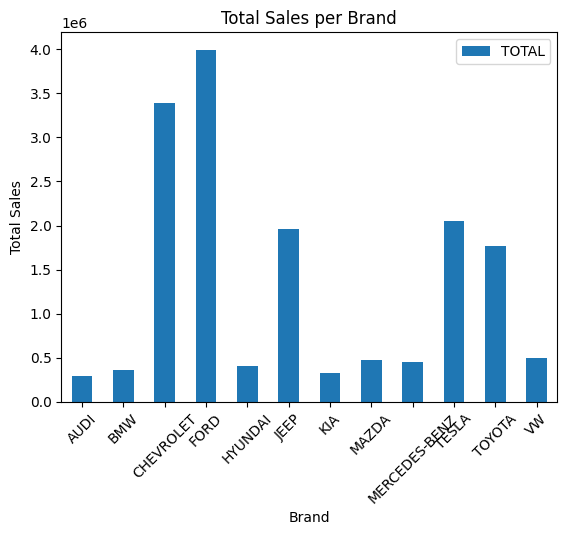

In [19]:
plt.figure(figsize=(10, 6))
total_sales_per_brand.plot(kind='bar')
plt.title('Total Sales per Brand')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

The next graph shows us the average monthly sales 

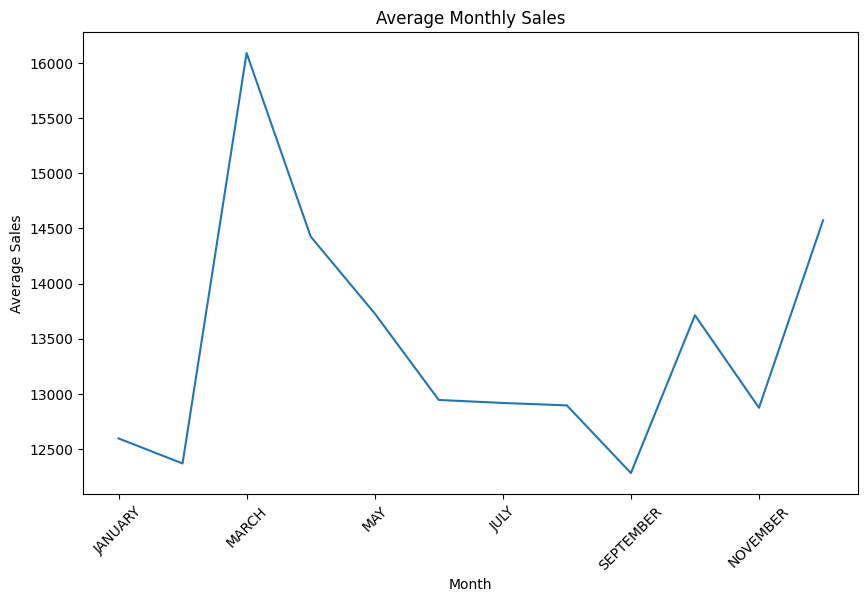

In [20]:
plt.figure(figsize=(10, 6))
average_monthly_sales.plot(kind='line')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

In the next graph we will use pie chart to give us the sales distribution per category in percentage

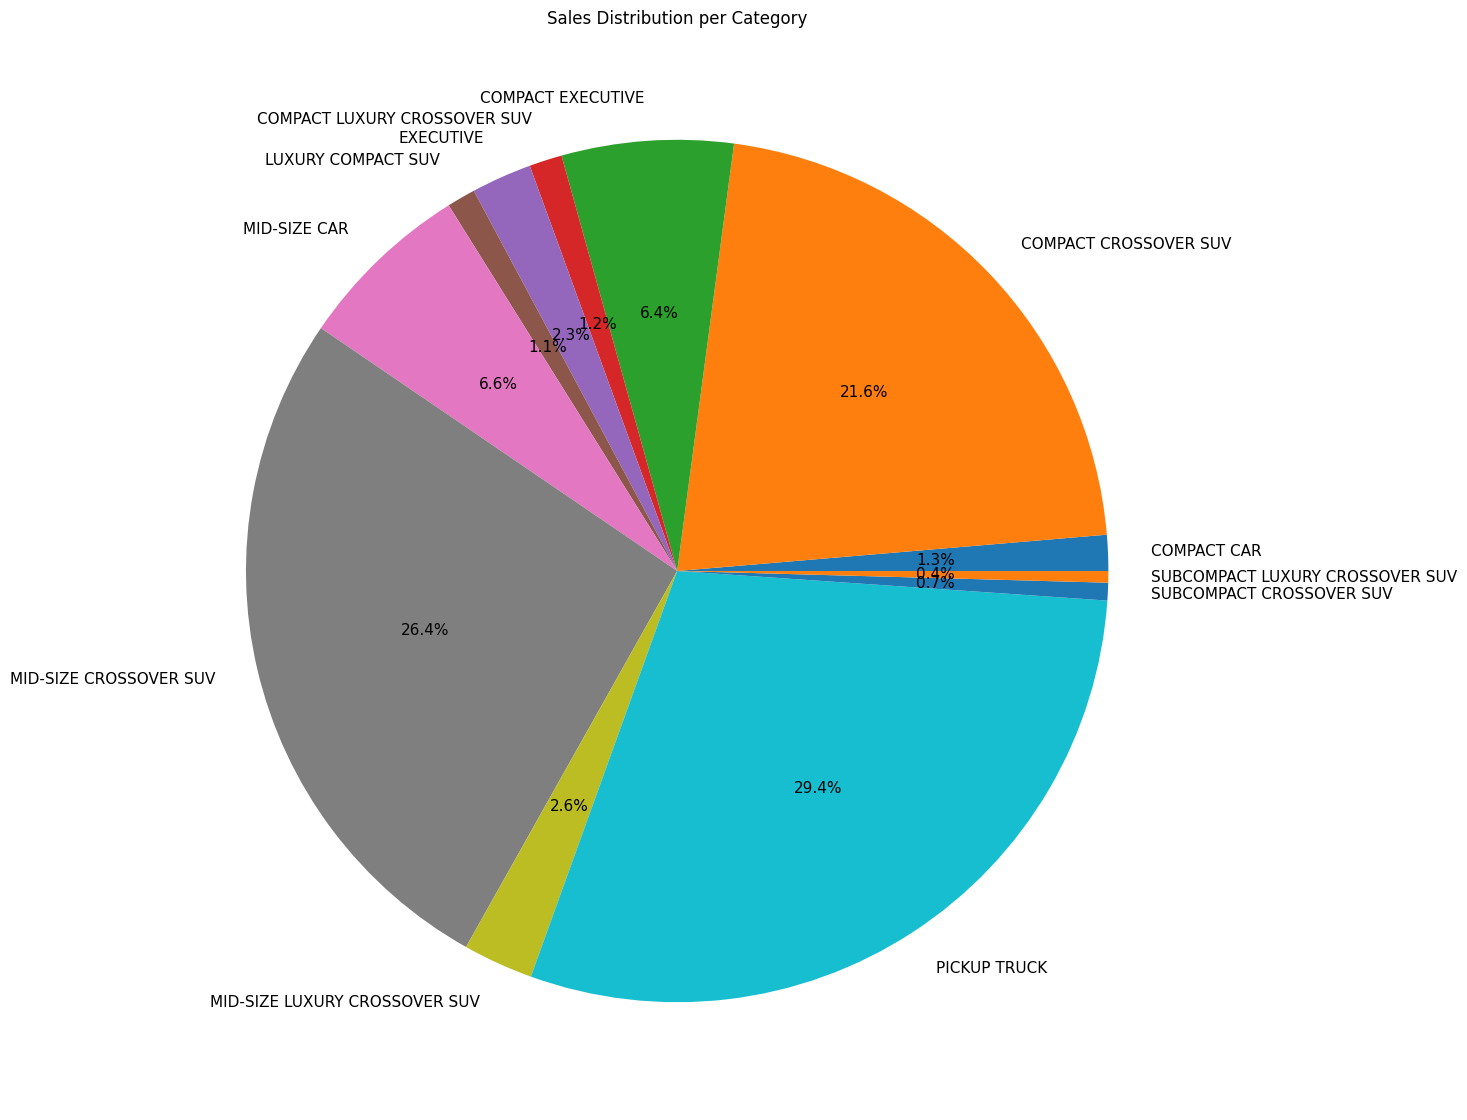

In [21]:
plt.figure(figsize=(14, 14))
total_sales_per_category.plot(kind='pie',autopct='%1.1f%%',startangle=0,textprops={'fontsize':11})                                                            
plt.title('Sales Distribution per Category')
plt.ylabel('')
plt.show()

The next graph compares sales of this year and last year

<Axes: title={'center': 'Yearly Sales Comparison'}, xlabel='MAKER', ylabel='Sales'>

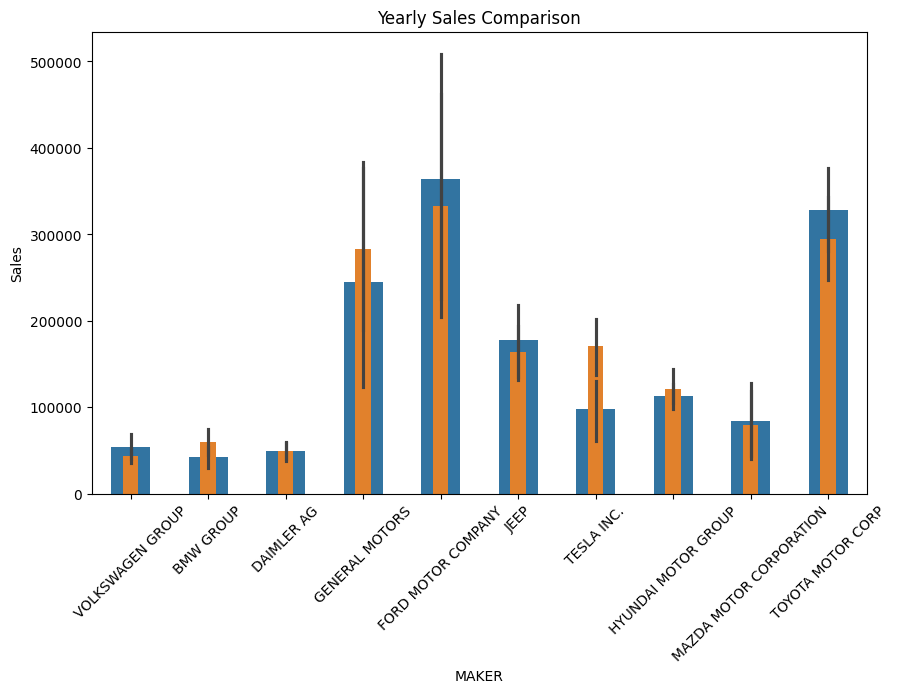

In [22]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.title('Yearly Sales Comparison')
sb.barplot(data=df , x='MAKER', y='SALESLY',width=0.5)
sb.barplot(data=df , x='MAKER', y='TOTAL',width=0.2)

The next graph shows sales last year of each model

<Axes: title={'center': 'Model Sales Last Year'}, xlabel='MODEL', ylabel='SALESLY'>

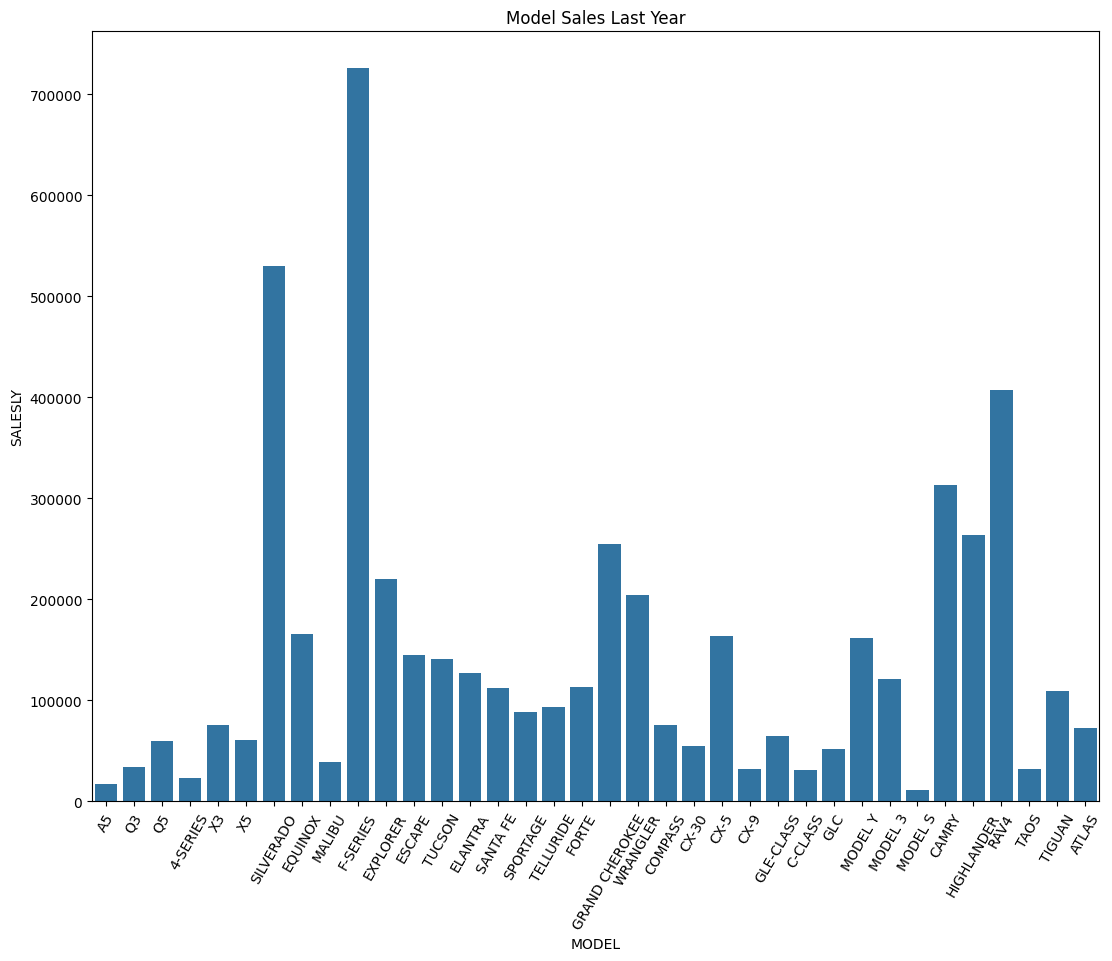

In [23]:
plt.figure(figsize=(13, 10))
plt.xticks(rotation=60)
plt.title('Model Sales Last Year')
sb.barplot(data=sales , x='MODEL', y='SALESLY')

The next set of graphs will show the sales per month per each brand

<Axes: xlabel='BRAND', ylabel='DECEMBER'>

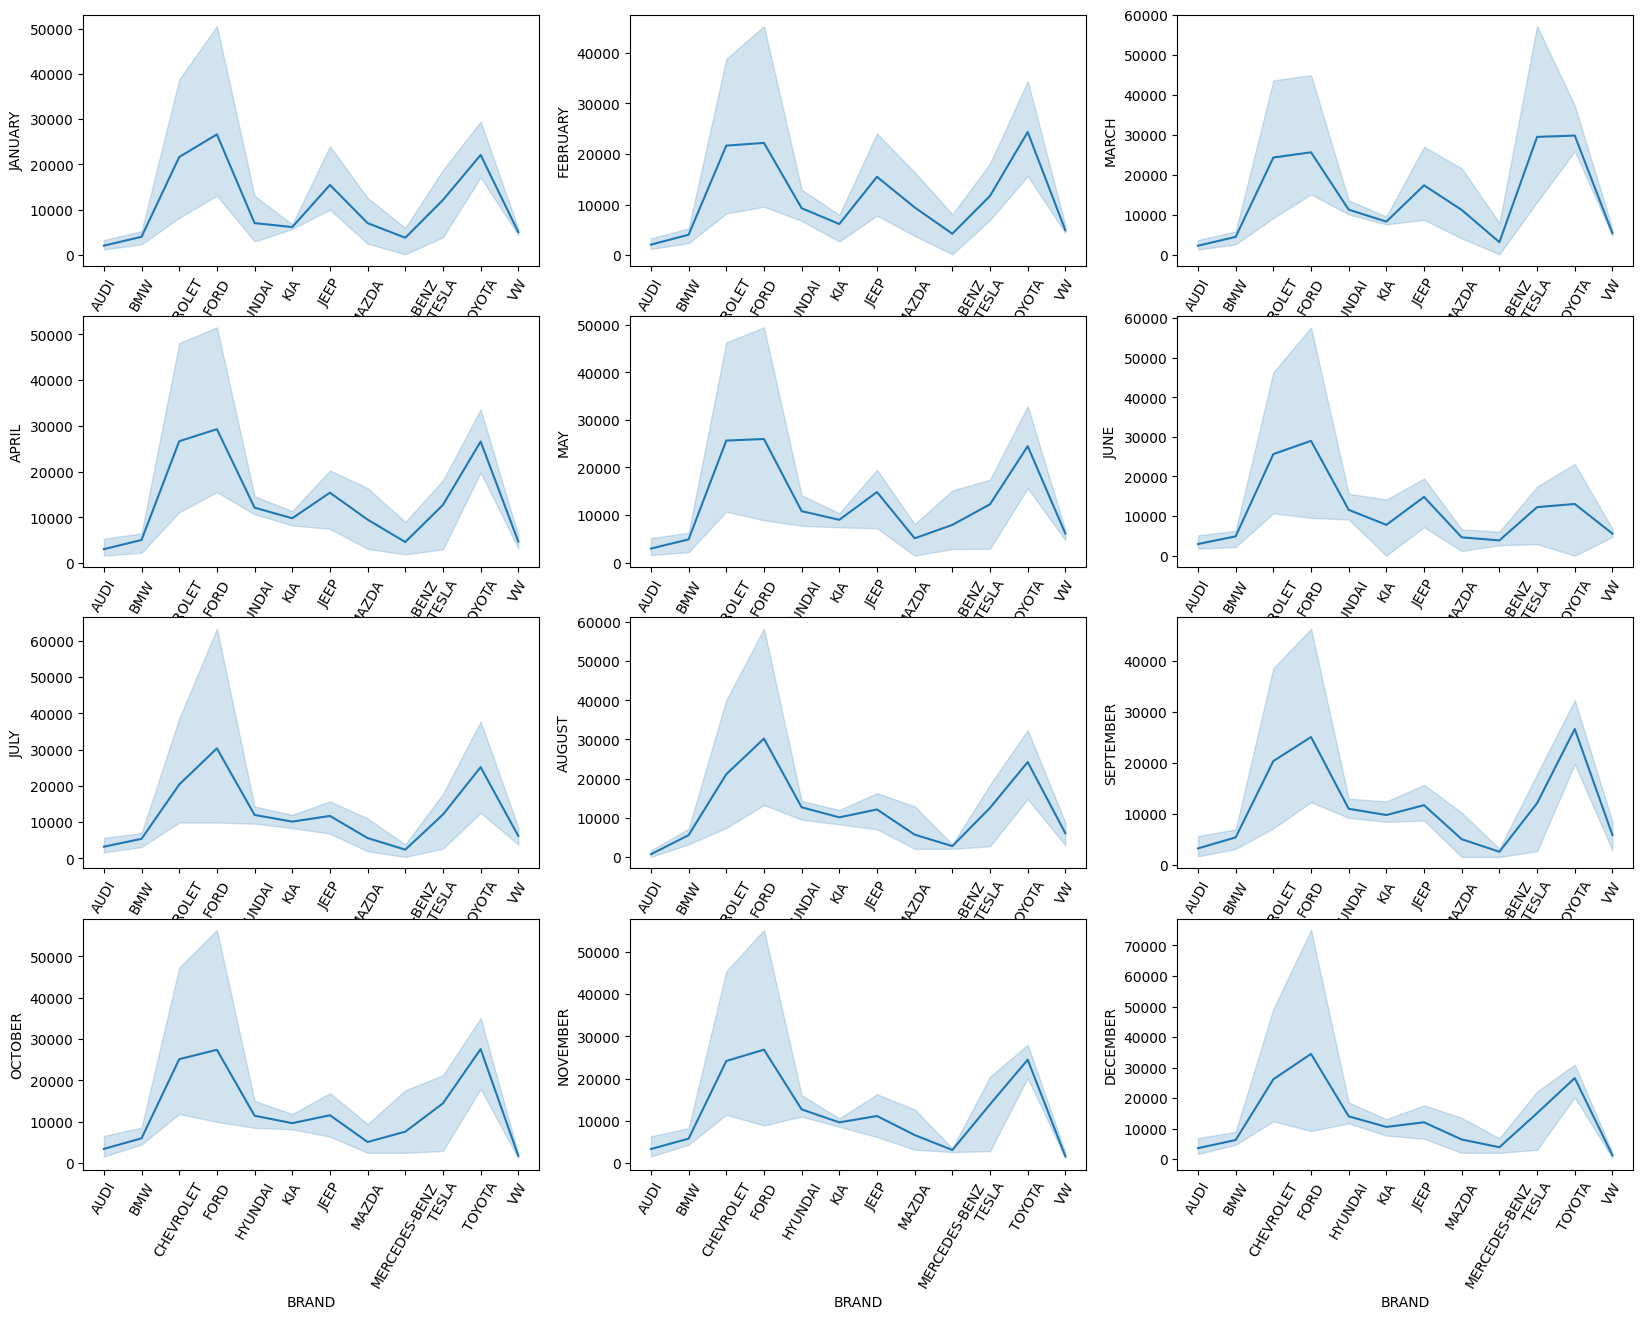

In [24]:
plt.figure(figsize=(20, 15))


plt1 = plt.subplot(4, 3, 1)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='JANUARY')

plt2 = plt.subplot(4, 3, 2)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='FEBRUARY')

plt3 = plt.subplot(4, 3, 3)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='MARCH')

plt4 = plt.subplot(4, 3, 4)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='APRIL')

plt4 = plt.subplot(4, 3, 5)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='MAY')

plt5 = plt.subplot(4, 3, 6)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='JUNE')

plt6 = plt.subplot(4, 3, 7)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='JULY')

plt7 = plt.subplot(4, 3, 8)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='AUGUST')

plt8 = plt.subplot(4, 3, 9)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='SEPTEMBER')

plt9 = plt.subplot(4, 3, 10)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='OCTOBER')

plt10 = plt.subplot(4, 3, 11)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='NOVEMBER')


plt11 = plt.subplot(4, 3, 12)
plt.xticks(rotation=60)
sb.lineplot(data=sales,x='BRAND',y='DECEMBER')


The next graph shows a heatmap of monthly sales for each brand

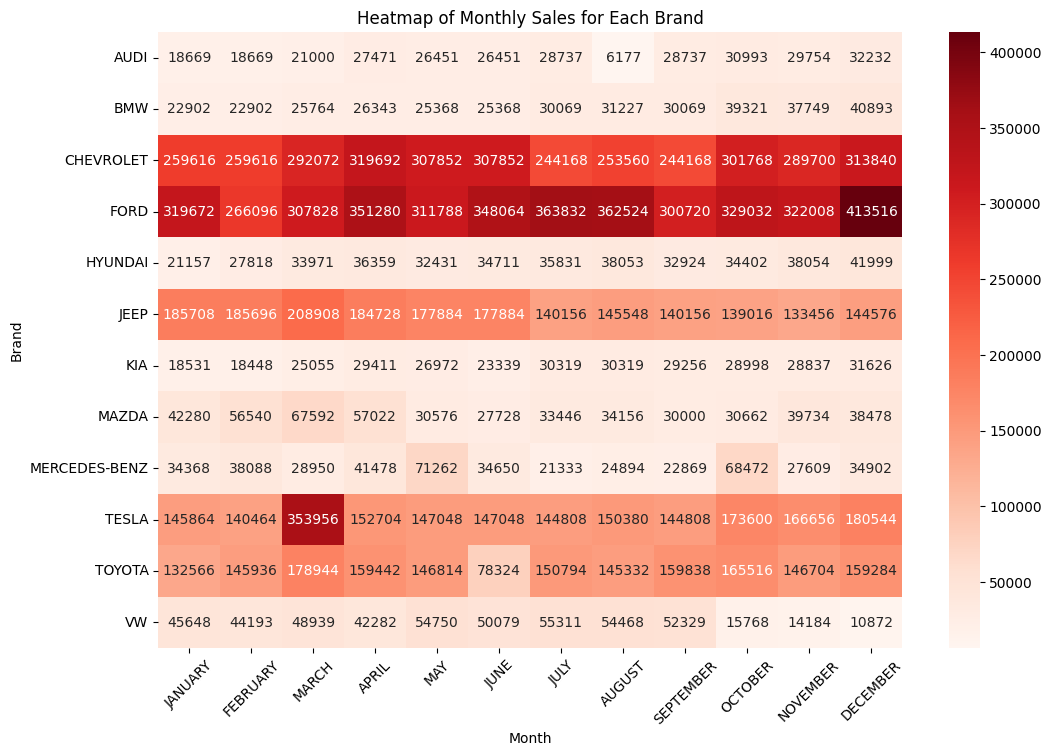

In [25]:
plt.figure(figsize=(12, 8))
sb.heatmap(sales_per_brand_per_month, annot=True, fmt="d", cmap="Reds")
plt.title('Heatmap of Monthly Sales for Each Brand')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Brand')
plt.show()

The next graph shows the monthly sales per country

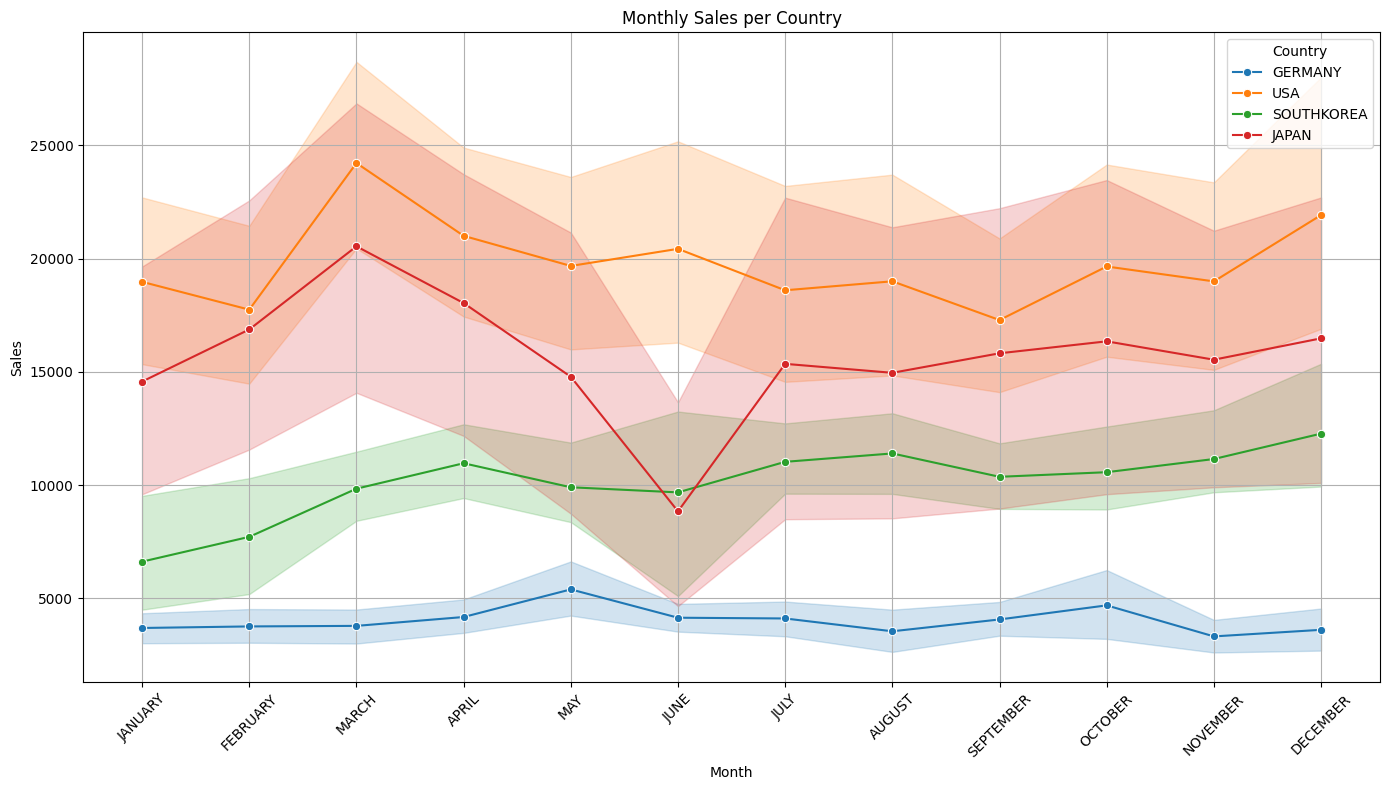

In [26]:
plt.figure(figsize=(14, 8))
df_melted = df.melt(id_vars=['COUNTRY'], value_vars=monthly_columns, var_name='Month', value_name='Sales')
sb.lineplot(data=df_melted, x='Month', y='Sales', hue='COUNTRY', marker='o')
plt.title('Monthly Sales per Country')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()